# Housing Hypothesis Testing

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)
from scipy.stats import ttest_ind

In [20]:
df = pd.read_csv("data/train.csv")

In [21]:
df.shape

(1460, 81)

In [22]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [23]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [110]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.500000,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.000000,70.00,190.0
LotFrontage,1460.0,70.049958,22.024023,21.0,60.00,70.049958,79.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.500000,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.000000,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.000000,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.000000,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.000000,2004.00,2010.0
MasVnrArea,1460.0,103.685262,180.569112,0.0,0.00,0.000000,164.25,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.500000,712.25,5644.0


## missing value handling

In [25]:
for column in df.columns:
    print(column, df[column].isna().sum())

Id 0
MSSubClass 0
MSZoning 0
LotFrontage 259
LotArea 0
Street 0
Alley 1369
LotShape 0
LandContour 0
Utilities 0
LotConfig 0
LandSlope 0
Neighborhood 0
Condition1 0
Condition2 0
BldgType 0
HouseStyle 0
OverallQual 0
OverallCond 0
YearBuilt 0
YearRemodAdd 0
RoofStyle 0
RoofMatl 0
Exterior1st 0
Exterior2nd 0
MasVnrType 872
MasVnrArea 8
ExterQual 0
ExterCond 0
Foundation 0
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinSF1 0
BsmtFinType2 38
BsmtFinSF2 0
BsmtUnfSF 0
TotalBsmtSF 0
Heating 0
HeatingQC 0
CentralAir 0
Electrical 1
1stFlrSF 0
2ndFlrSF 0
LowQualFinSF 0
GrLivArea 0
BsmtFullBath 0
BsmtHalfBath 0
FullBath 0
HalfBath 0
BedroomAbvGr 0
KitchenAbvGr 0
KitchenQual 0
TotRmsAbvGrd 0
Functional 0
Fireplaces 0
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageCars 0
GarageArea 0
GarageQual 81
GarageCond 81
PavedDrive 0
WoodDeckSF 0
OpenPorchSF 0
EnclosedPorch 0
3SsnPorch 0
ScreenPorch 0
PoolArea 0
PoolQC 1453
Fence 1179
MiscFeature 1406
MiscVal 0
MoSold 0
YrS

In [26]:
df.drop(df.columns[df.isnull().mean() > 0.40], axis=1, inplace=True)

In [27]:
missing_values = df.isna().sum()
columns_with_missing = missing_values[missing_values > 0]
df[columns_with_missing.index].head()

,LotFrontage,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
0,65.0,196.0,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,2003.0,RFn,TA,TA
1,80.0,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,Attchd,1976.0,RFn,TA,TA
2,68.0,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,Attchd,2001.0,RFn,TA,TA
3,60.0,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Detchd,1998.0,Unf,TA,TA
4,84.0,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,Attchd,2000.0,RFn,TA,TA


In [28]:
df[columns_with_missing.index].dtypes

LotFrontage     float64
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
dtype: object

### float values

In [29]:
LotFrontage_mean = df["LotFrontage"].mean()
MasVnrArea_mean = df["MasVnrArea"].mean()
GarageYrBlt_mean = df["GarageYrBlt"].mean()

In [30]:
df["LotFrontage"].fillna(LotFrontage_mean, inplace=True)
df["MasVnrArea"].fillna(MasVnrArea_mean, inplace=True)
df["GarageYrBlt"].fillna(GarageYrBlt_mean, inplace=True)

### object values

In [31]:
columns_with_missing

LotFrontage     259
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [32]:
df = df.fillna(df.mode().iloc[0])

In [33]:
for column in df.columns:
    print(column, df[column].isna().sum())

Id 0
MSSubClass 0
MSZoning 0
LotFrontage 0
LotArea 0
Street 0
LotShape 0
LandContour 0
Utilities 0
LotConfig 0
LandSlope 0
Neighborhood 0
Condition1 0
Condition2 0
BldgType 0
HouseStyle 0
OverallQual 0
OverallCond 0
YearBuilt 0
YearRemodAdd 0
RoofStyle 0
RoofMatl 0
Exterior1st 0
Exterior2nd 0
MasVnrArea 0
ExterQual 0
ExterCond 0
Foundation 0
BsmtQual 0
BsmtCond 0
BsmtExposure 0
BsmtFinType1 0
BsmtFinSF1 0
BsmtFinType2 0
BsmtFinSF2 0
BsmtUnfSF 0
TotalBsmtSF 0
Heating 0
HeatingQC 0
CentralAir 0
Electrical 0
1stFlrSF 0
2ndFlrSF 0
LowQualFinSF 0
GrLivArea 0
BsmtFullBath 0
BsmtHalfBath 0
FullBath 0
HalfBath 0
BedroomAbvGr 0
KitchenAbvGr 0
KitchenQual 0
TotRmsAbvGrd 0
Functional 0
Fireplaces 0
GarageType 0
GarageYrBlt 0
GarageFinish 0
GarageCars 0
GarageArea 0
GarageQual 0
GarageCond 0
PavedDrive 0
WoodDeckSF 0
OpenPorchSF 0
EnclosedPorch 0
3SsnPorch 0
ScreenPorch 0
PoolArea 0
MiscVal 0
MoSold 0
YrSold 0
SaleType 0
SaleCondition 0
SalePrice 0


### Visualizing

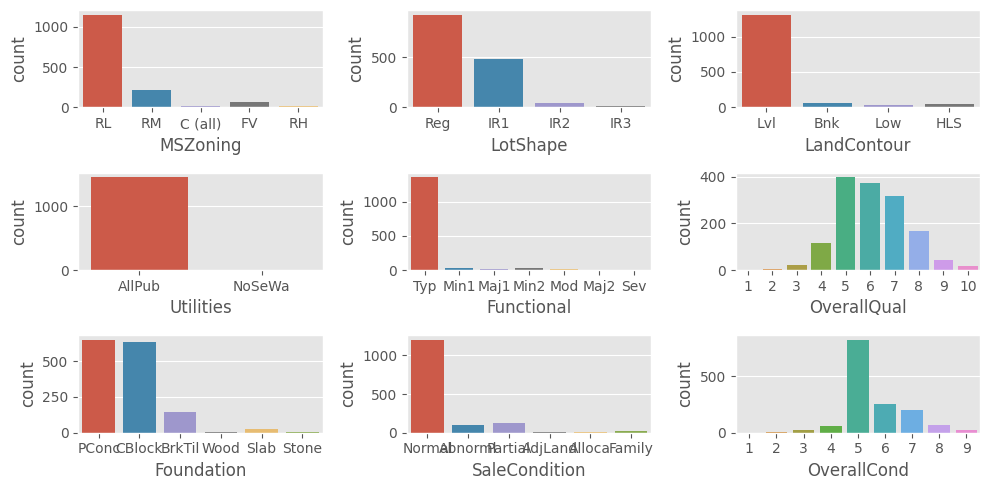

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 5))

sns.countplot(data=df, x='MSZoning', ax=axes[0, 0])
sns.countplot(data=df, x='LotShape', ax=axes[0, 1])
sns.countplot(data=df, x='Utilities', ax=axes[1, 0])
sns.countplot(data=df, x='Functional', ax=axes[1, 1])
sns.countplot(data=df, x='LandContour', ax=axes[0, 2])
sns.countplot(data=df, x='OverallQual', ax=axes[1, 2])
sns.countplot(data=df, x='Foundation', ax=axes[2, 0])
sns.countplot(data=df, x='SaleCondition', ax=axes[2, 1])
sns.countplot(data=df, x='OverallCond', ax=axes[2, 2])
plt.tight_layout()
plt.show()


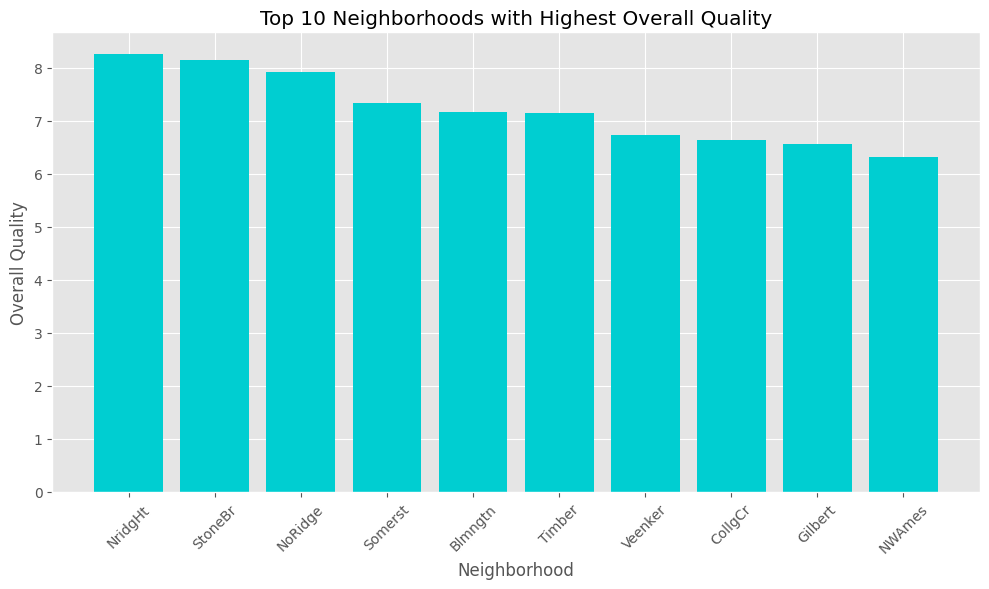

In [131]:
neighborhood_groups = df.groupby('Neighborhood')
neighborhood_quality = neighborhood_groups['OverallQual'].mean()
neighborhood_quality_sorted = neighborhood_quality.sort_values(ascending=False)
top_10_neighborhoods = neighborhood_quality_sorted.head(10)


plt.figure(figsize=(10, 6))
plt.bar(top_10_neighborhoods.index, top_10_neighborhoods.values, color='darkturquoise')
plt.xlabel('Neighborhood')
plt.ylabel('Overall Quality')
plt.title('Top 10 Neighborhoods with Highest Overall Quality')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

plt.tight_layout()
plt.show()


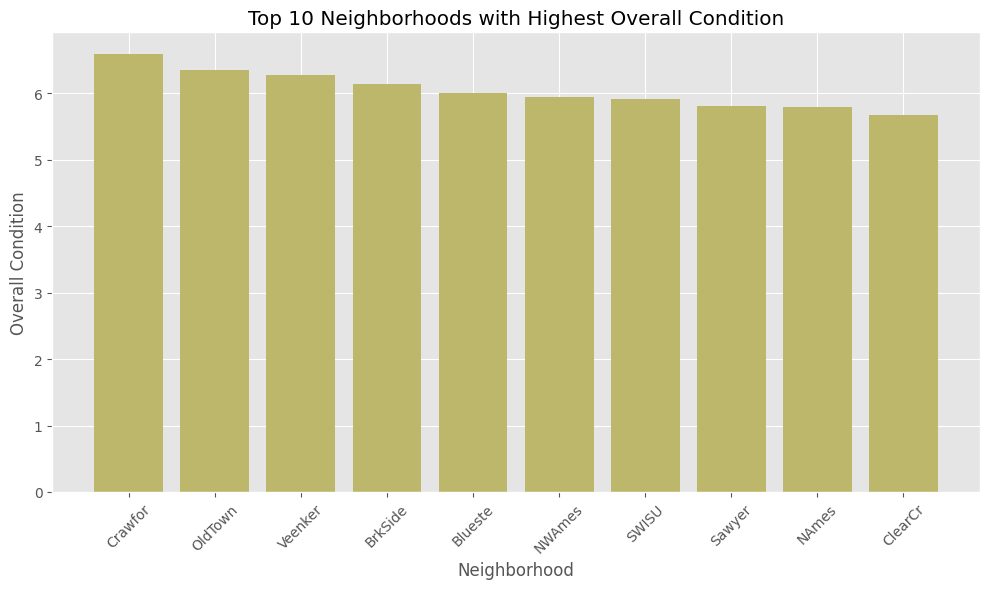

In [129]:
neighborhood_groups = df.groupby('Neighborhood')
neighborhood_quality = neighborhood_groups['OverallCond'].mean()
neighborhood_quality_sorted = neighborhood_quality.sort_values(ascending=False)
top_10_neighborhoods = neighborhood_quality_sorted.head(10)


plt.figure(figsize=(10, 6))
plt.bar(top_10_neighborhoods.index, top_10_neighborhoods.values, color='darkkhaki')
plt.xlabel('Neighborhood')
plt.ylabel('Overall Condition')
plt.title('Top 10 Neighborhoods with Highest Overall Condition')
plt.xticks(rotation=45)  

plt.tight_layout()
plt.show()


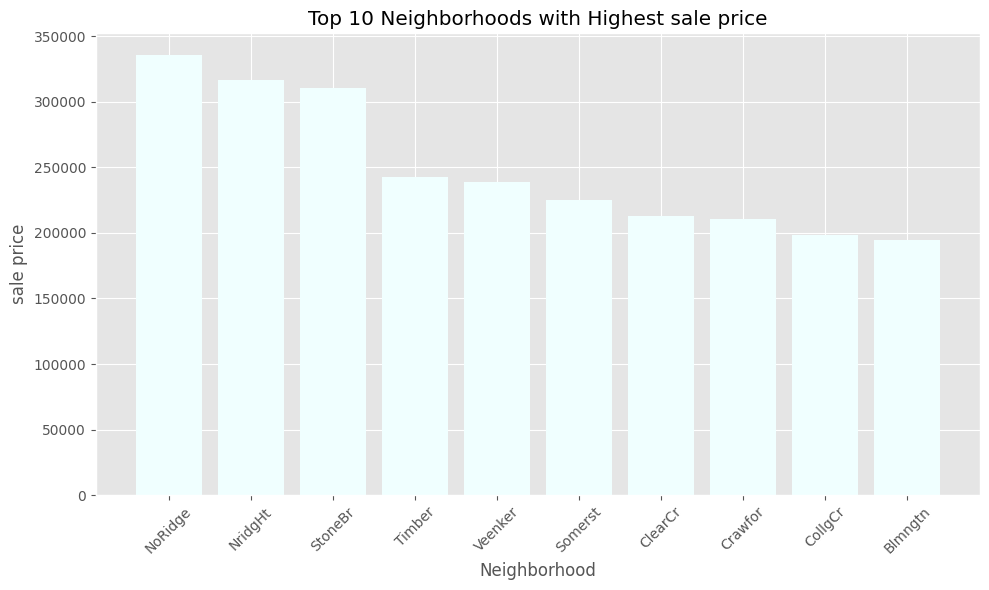

In [126]:
neighborhood_groups = df.groupby('Neighborhood')
neighborhood_price = neighborhood_groups['SalePrice'].mean()
neighborhood_price_sorted = neighborhood_price.sort_values(ascending=False)
top_10_neighborhoods = neighborhood_price_sorted.head(10)


plt.figure(figsize=(10, 6))
plt.bar(top_10_neighborhoods.index, top_10_neighborhoods.values, color='azure')
plt.xlabel('Neighborhood')
plt.ylabel('sale price')
plt.title('Top 10 Neighborhoods with Highest sale price')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


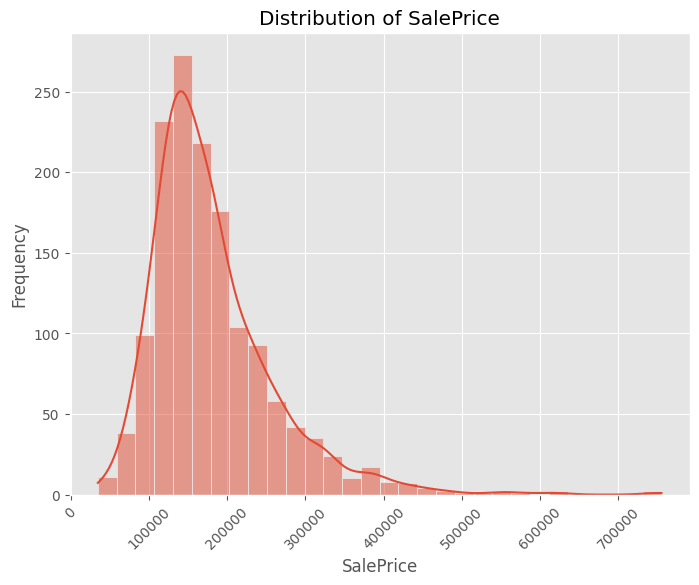

In [117]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='SalePrice', bins=30, kde=True)
plt.ylabel('Frequency')
plt.title('Distribution of SalePrice')
plt.xticks(rotation=45)
plt.show()


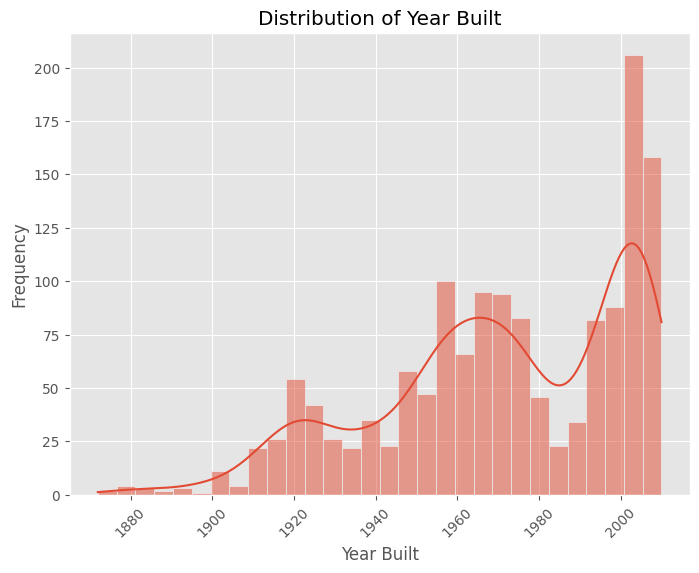

In [84]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='YearBuilt', bins=30, kde=True)
plt.xlabel('Year Built')
plt.ylabel('Frequency')
plt.title('Distribution of Year Built')
plt.xticks(rotation=45)
plt.show()


## deleting outlier from needed features

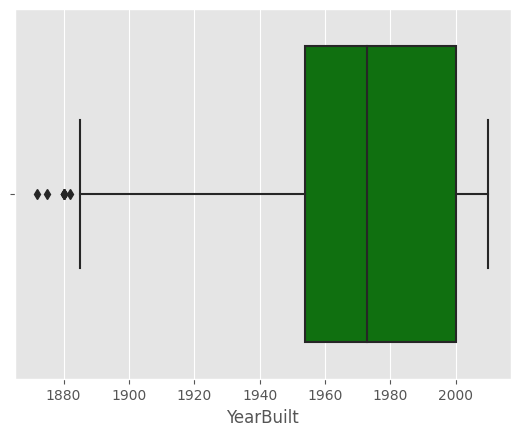

In [132]:
sns.boxplot(x = 'YearBuilt', data = df, color = 'green')
plt.show()

In [139]:
Q1 = df['YearBuilt'].quantile(0.25)
Q3 = df['YearBuilt'].quantile(0.75)
IQR = Q3 - Q1

filter = (df['YearBuilt'] >= Q1 - 1.5 * IQR) & (df['YearBuilt'] <= Q3 + 1.5 *IQR)
df = df.loc[filter]  

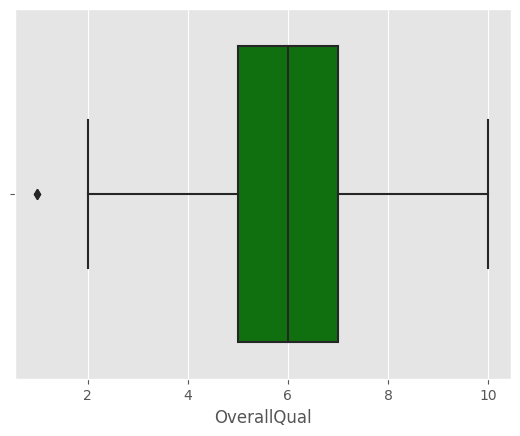

In [134]:
sns.boxplot(x = 'OverallQual', data = df, color = 'green')
plt.show()

In [137]:
Q1 = df['OverallQual'].quantile(0.25)
Q3 = df['OverallQual'].quantile(0.75)
IQR = Q3 - Q1

filter = (df['OverallQual'] >= Q1 - 1.5 * IQR) & (df['OverallQual'] <= Q3 + 1.5 *IQR)
df = df.loc[filter]  

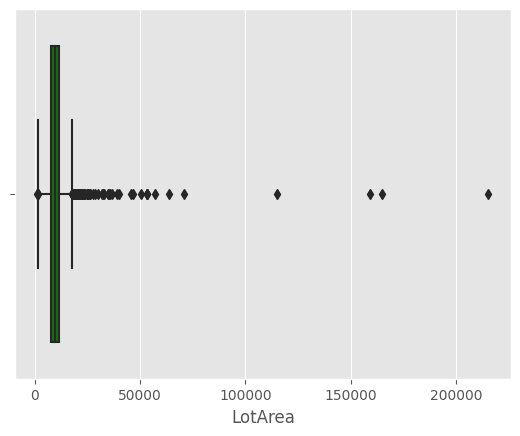

In [140]:
sns.boxplot(x = 'LotArea', data = df, color = 'green')
plt.show()

In [141]:
Q1 = df['LotArea'].quantile(0.25)
Q3 = df['LotArea'].quantile(0.75)
IQR = Q3 - Q1

filter = (df['LotArea'] >= Q1 - 1.5 * IQR) & (df['LotArea'] <= Q3 + 1.5 *IQR)
df = df.loc[filter]  

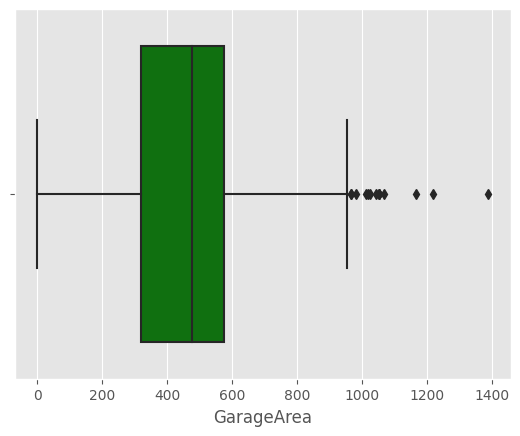

In [143]:
sns.boxplot(x = 'GarageArea', data = df, color = 'green')
plt.show()

In [144]:
Q1 = df['GarageArea'].quantile(0.25)
Q3 = df['GarageArea'].quantile(0.75)
IQR = Q3 - Q1

filter = (df['GarageArea'] >= Q1 - 1.5 * IQR) & (df['GarageArea'] <= Q3 + 1.5 *IQR)
df = df.loc[filter]  

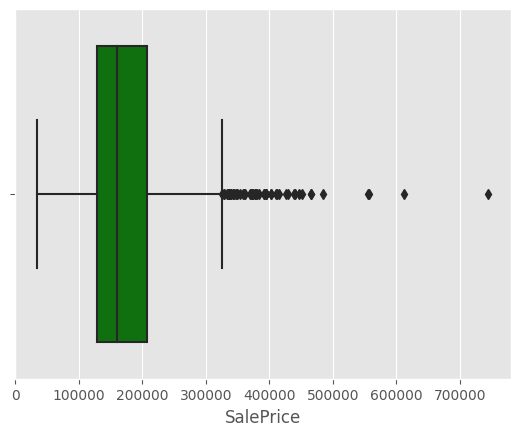

In [145]:
sns.boxplot(x = 'SalePrice', data = df, color = 'green')
plt.show()

In [146]:
Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)
IQR = Q3 - Q1

filter = (df['SalePrice'] >= Q1 - 1.5 * IQR) & (df['SalePrice'] <= Q3 + 1.5 *IQR)
df = df.loc[filter]  

### 1 :
#### Null Hypothesis (H0):  
over all data quality is normally distributed. 
#### Alternative Hypothesis (H1):  
over all data quality is not normally distributed. 

In [68]:
from scipy.stats import shapiro

statistic, p_value = shapiro(df['OverallQual'])

print(f"Test Statistic: {statistic}")
print(f"P-value: {p_value}")


Test Statistic: 0.9480094909667969
P-value: 2.688552318270029e-22


over all quality of the data seems to be normally distributed

### 2 :
#### Null Hypothesis (H0):  
The mean lot area of 400 newest built houses is equal to the mean lot area of 400 oldest built houses.  
#### Alternative Hypothesis (H1):  
The mean lot area of 400 newest built houses is not equal to the mean lot area of 400 oldest built houses.

In [58]:
top_400_samples = df.nlargest(400, 'YearBuilt')

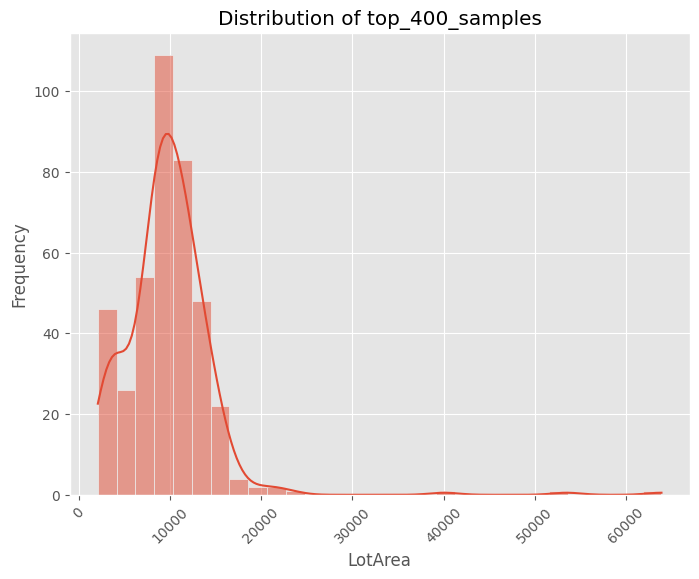

In [147]:
plt.figure(figsize=(8, 6))
sns.histplot(data=top_400_samples, x='LotArea', bins=30, kde=True)
plt.ylabel('Frequency')
plt.title('Distribution of top_400_samples')
plt.xticks(rotation=45)
plt.show()


In [60]:
bottom_400_samples = df.nsmallest(400, 'LotArea')

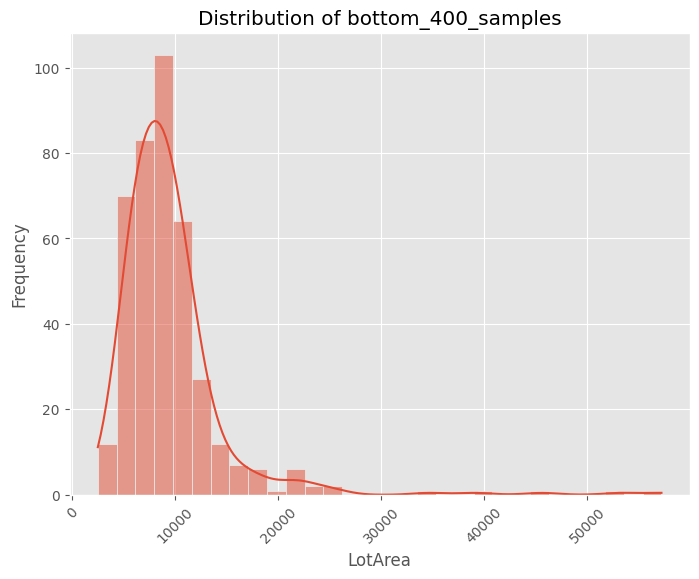

In [148]:
plt.figure(figsize=(8, 6))
sns.histplot(data=bottom_400_samples, x='LotArea', bins=30, kde=True)
plt.ylabel('Frequency')
plt.title('Distribution of bottom_400_samples')
plt.xticks(rotation=45)
plt.show()


In [65]:
t_stat, p_value = ttest_ind(top_400_samples['LotArea'], bottom_400_samples['LotArea'])
print("T-statistic value: ", t_stat)
print("P-Value: ", p_value)

T-statistic value:  0.7711515369641121
P-Value:  0.4408453843384621


p-value of 0.44 indicates we do not have enogh evidence to reject the null hypothesis

### 3 :
#### Null Hypothesis (H0):  
street ( what kind of road is from street to the property) is not correlated with zoning classification of the sale.
#### Alternative Hypothesis (H1):  
street ( what kind of road is from street to the property) is correlated with zoning classification of the sale.

In [82]:
from scipy.stats import chi2_contingency

street = df['Street']
ms = df['MSZoning']

contingency_table = pd.crosstab(ms, street)
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_val}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Chi-Square Statistic: 94.74158356813642
P-value: 1.293331100878627e-19
Degrees of Freedom: 4
Expected Frequencies:
[[4.10958904e-02 9.95890411e+00]
 [2.67123288e-01 6.47328767e+01]
 [6.57534247e-02 1.59342466e+01]
 [4.73013699e+00 1.14626986e+03]
 [8.95890411e-01 2.17104110e+02]]


given the above ressult we can strongly reject the null hypothesis.

<Figure size 800x600 with 0 Axes>

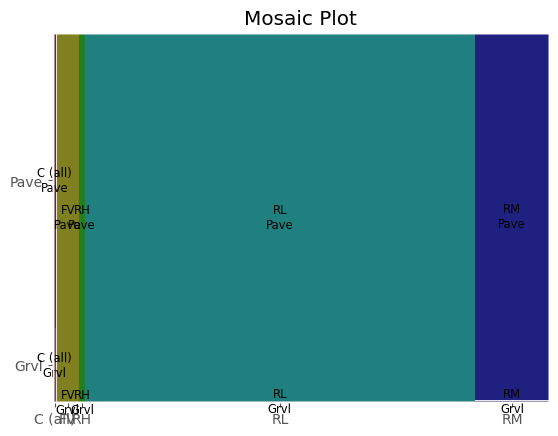

In [87]:
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

plt.figure(figsize=(8, 6))
mosaic(contingency_table.stack(), gap=0.001, title='Mosaic Plot')
plt.show()

### 4 :
#### Null Hypothesis (H0):  
average garage are is equal to 500.
#### Alternative Hypothesis (H1):  
average garage are is not equal to 500.

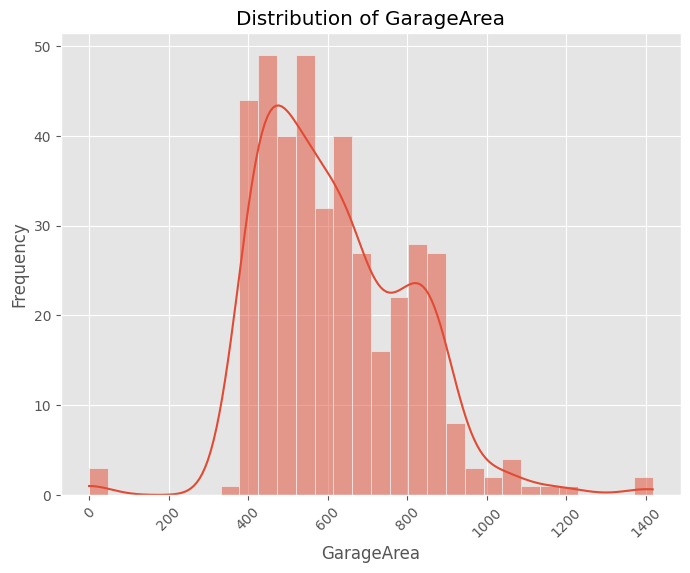

In [103]:
plt.figure(figsize=(8, 6))
sns.histplot(data=top_400_samples, x='GarageArea', bins=30, kde=True)
plt.ylabel('Frequency')
plt.title('Distribution of GarageArea')
plt.xticks(rotation=45)
plt.show()


In [108]:
from scipy.stats import ttest_1samp
import numpy as np
garage_area = df['GarageArea']
null_hypothesis_mean = 500
t_statistic, p_value = ttest_1samp(garage_area, null_hypothesis_mean)
print(f"T-Statistic value: {t_statistic}")
print(f"P-Value: {p_value}")


T-Statistic value: -4.828831326245644
P-Value: 1.5177820717041082e-06


given the result , the null hypothesis is strongly rejected.

#### Null Hypothesis (H0):
There is no significant difference in the mean sale prices across different categories of foundation types.

#### Alternative Hypothesis (H1):
There is a significant difference in the mean sale prices across different categories of foundation types.

In [109]:
from scipy.stats import f_oneway

grouped_data = []

for category in df['Foundation'].unique():
    group = df[df['Foundation'] == category]['SalePrice']
    grouped_data.append(group)


f_statistic, p_value = f_oneway(*grouped_data)

print(f"F-Statistic: {f_statistic}")
print(f"P-value: {p_value}")


F-Statistic: 100.25385058740888
P-value: 5.791895002232234e-91
